# BAX 452 001-002 WQ 2024 Machine Learning
# Assignment 2
# Group 5
# Hitesh Kunchakuri, Shivank Chandra, Richard Liu

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.stats import kstest
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [2]:
directory_path = '/Users/hiteshkunchakuri/Downloads/Winter - Machine Learning/HW 2'
os.chdir(directory_path)
current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /Users/hiteshkunchakuri/Downloads/Winter - Machine Learning/HW 2


1. **Data Exploration and Visualization**:
- Explore the Breast Cancer Dataset.
- Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
- Include any other plots you find interesting and provide brief interpretations.

In [3]:
cancer = 'Cancer.csv'
cancer_df = pd.read_csv(cancer)

In [4]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
cancer_df.head()
cancer_df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [6]:
print(cancer_df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [7]:
cancer_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


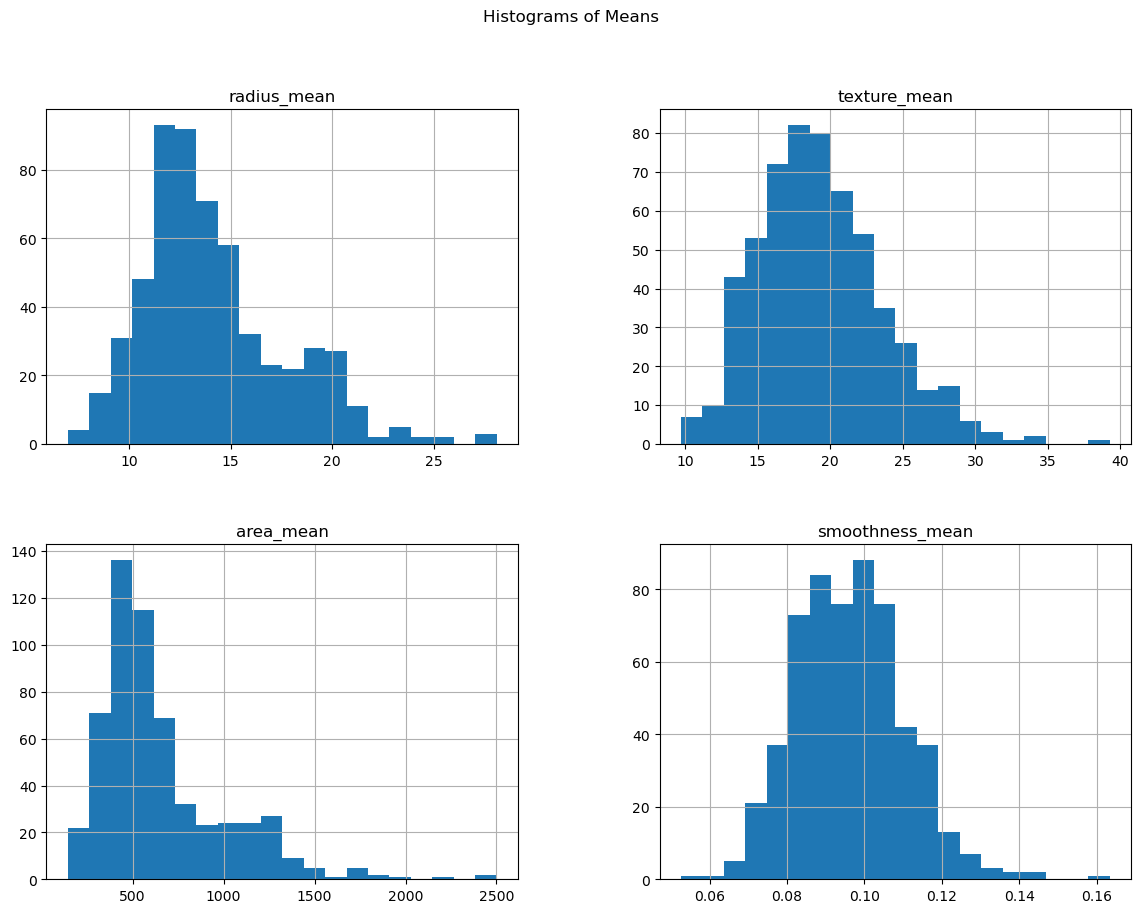

In [8]:
# Histograms for Radius Mean, Texture Mean, Smoothness Mean and Area Mean
cancer_df.hist(['radius_mean', 'texture_mean', 'area_mean','smoothness_mean'], bins=20, figsize=(14,10))
plt.suptitle('Histograms of Means')
plt.show()

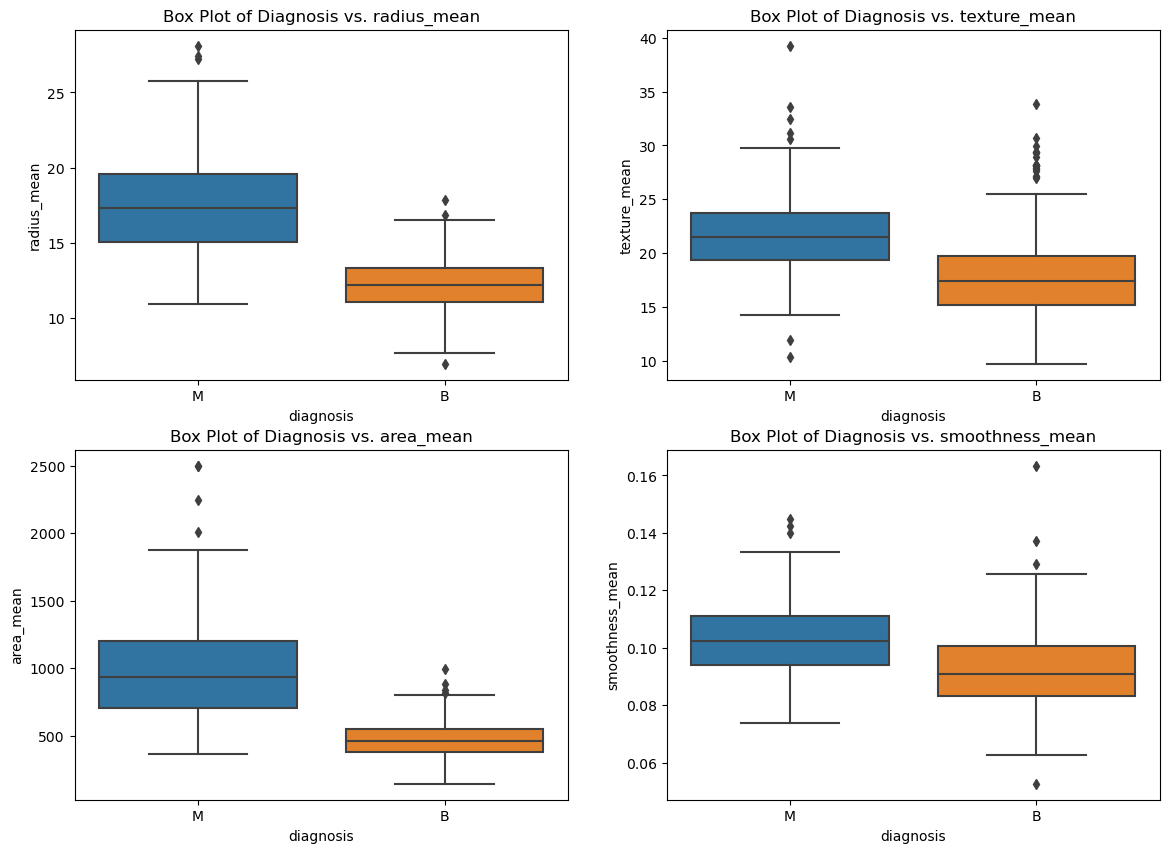

In [9]:
# Box plots for diagnosis vs. different means
selected_features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']
plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=cancer_df)
    plt.title(f'Box Plot of Diagnosis vs. {feature}')

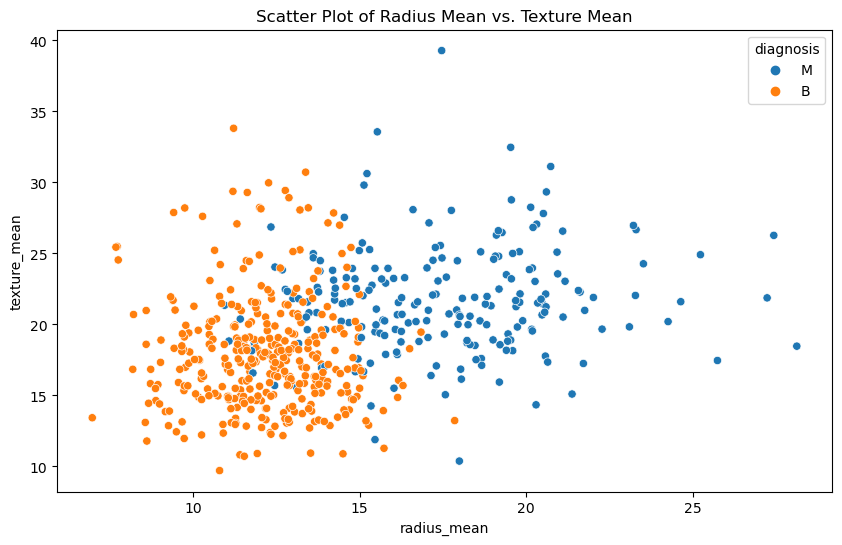

In [10]:
# Scatter plot between radius_mean and texture_mean
plt.figure(figsize=(10, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=cancer_df)
plt.title('Scatter Plot of Radius Mean vs. Texture Mean')
plt.show()

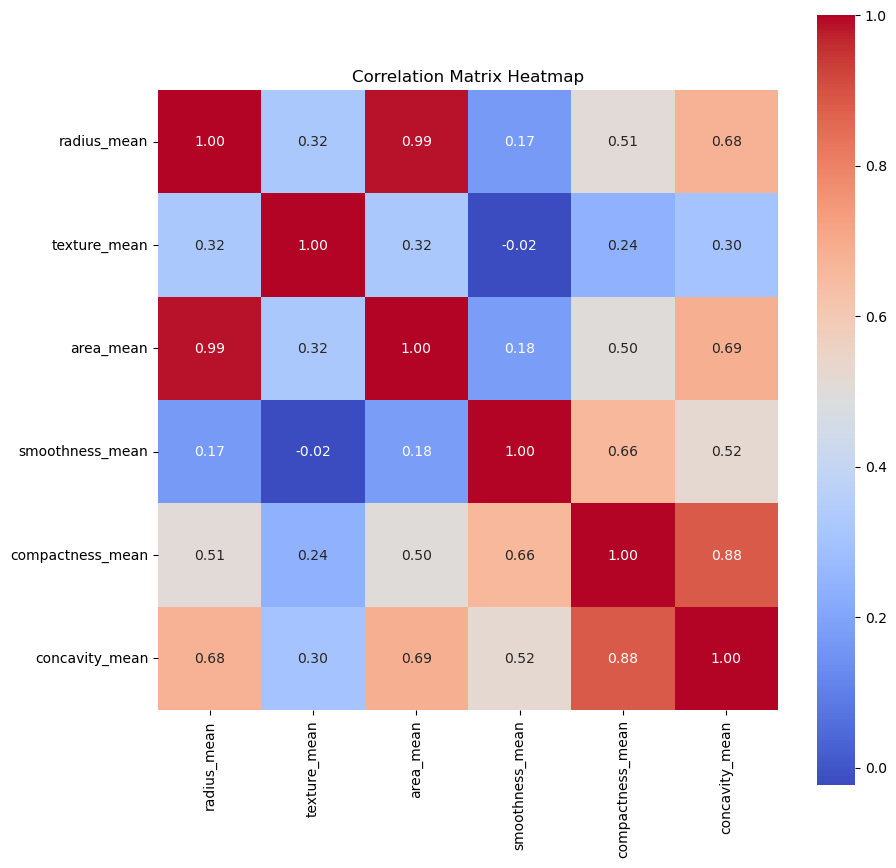

In [11]:
# Correlation matrix heatmap
means = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean','compactness_mean','concavity_mean']
corr_matrix = cancer_df.loc[:, means].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, square=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

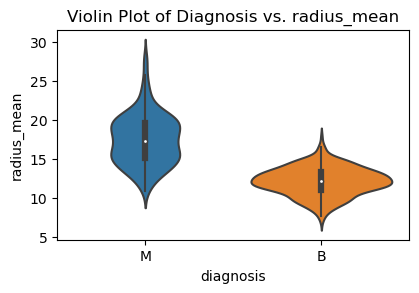

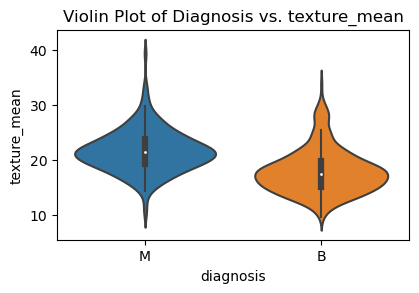

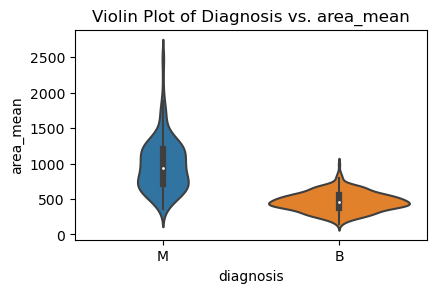

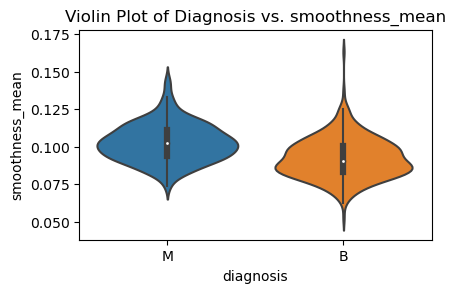

In [12]:
# Violin plots for diagnosis vs. multiple features
features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean']
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, i)
    sns.violinplot(x='diagnosis', y=feature, data=cancer_df)
    plt.title(f'Violin Plot of Diagnosis vs. {feature}')
    plt.show()

Comment: In the first question, we explored the data by observing the information and developing graphs. We developed a histograms for radius mean, texture mean, smoothness mean and area mean to observe the patterns. Second, we made a box plots for diagnosis vs. different means, this is to compare the two different columns. Third, we graphed a scatter plot between radius mean and texture mean, it can help us to see how the numbers are located when placing together. Fourth, we developed a heatmap to observe the Correlation matrix between the means, includes
radius mean, texture mean, area mean, smoothness mean, compactness mean, and concavity mean. Lastly, we graphed  violin plots for diagnosis vs. multiple features, the shapes show us the difference of M and B when matching with different means. I found the violin plots to be the most interesting as it included many details about the features and diagnosis. It shows that area mean and radius mean have the most difference when it comes to M and B. 




2. **Logistic Regression Model Development**:
- Develop a logistic regression model to predict whether cancer is malignant or benign.
- Preprocess the data as necessary (handling missing values, encoding categorical variables, etc.).
- Explain the steps you took in preparing the data and developing the model.
- You might need to encode the values for your prediction.

In [13]:
missing_values = cancer_df.isnull().sum()
print("Missing Values:\n", missing_values, "Data Types:\n", cancer_df.dtypes)

Missing Values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64 Data Types:
 id                           

In [14]:
label_encoder = LabelEncoder()
cancer_df['diagnosis'] = label_encoder.fit_transform(cancer_df['diagnosis'])

In [15]:
# splitting the dataframe into x and y
X = cancer_df.drop('diagnosis', axis=1)
y = cancer_df['diagnosis']

In [16]:
#Standardize the features(for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [17]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)
#Create and train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
#Make predictions on the test set
y_pred = logreg_model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [19]:
print('Intercept:', logreg_model.intercept_)
print('Co-efficients: \n',logreg_model.coef_)

Intercept: [-0.3293739]
Co-efficients: 
 [[ 0.10373684  0.45690067  0.39781081  0.44358424  0.49386673  0.06341818
  -0.29643706  0.72422115  0.77902372  0.03107311 -0.34883448  1.0774257
   0.04871875  0.54330789  0.75782891  0.16263597 -0.91015433  0.05771947
   0.48978651 -0.15420674 -0.71904558  1.04857404  0.96005705  0.90016494
   0.97651855  0.44578506  0.04784068  0.8357549   0.93573639  0.77836997
   0.6545667 ]]


Comment: In question 2, we first organized the data by checking for any missing value and we used labelencoder to transform the 'diagnosis' column into numerical format. We then dropped the 'diagnosis' column and spilt the dataset into features(X) and target variable(y). Standardization was performed on the features next before we spilt the dataset into training and testing sets. We then used LogisticRegression modlel to the training data. Lastly, make prediction on the test set and then print it out. 

3. **Model Evaluation**:
- Evaluate your logistic regression model using appropriate metrics (e.g., accuracy, R^2, RMSE (all out-of-sample)).
- Split the dataset into training and testing sets to perform this evaluation.
- Interpret these metrics to assess the performance of your model. Is it good? Why?

In [20]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,3))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.979
Confusion Matrix:
 [[87  1]
 [ 2 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.98      0.96      0.97        55

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [21]:
#Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error(RMSE):", round(rmse,3))

Root Mean Squared Error(RMSE): 0.145


In [22]:
#Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", round(r_squared,3))

R-squared: 0.911


Comment: In question 3, we evaluated the model, the accruacy rate is 0.979 which is quite high, meaning that the model correctly predicted whether a tumor was malignant or benign. The confusion matrix shows that 53 cases were correctly predicted as malignant and 87 cases were correctly predicted as benign. The RMSE of 0.145 is low, indicating that the prediction is close to actual value. R-squared of 0.911 is high, shows that the model explains most of the variances. 


4. **Testing Interactions Between Features**:
- Explore and test the interactions between different features in the dataset. Pay particular attention to interactions involving both categorical/dummy and continuous variables.
- For this excercise, use a linear regression rather than a logistic regression model.
- Discuss issues that occur when using a linear regression model to predict binary outcomes.
- Create and analyze interaction terms involving categorical/dummy variables (such as 'diagnosis' converted into a dummy variable) and continuous variables (like 'radius_mean' or 'texture_mean').
- Fit a regression model that includes interaction terms, for example, between 'diagnosis' and 'radius_mean', and between 'diagnosis' and 'texture_mean'.
- Discuss the influence of these interactions on the model. Describe how to interpret these interactions and their implications for understanding the data.

In [23]:
# selecting columns to generate interaction terms
cancer_df_interaction=cancer_df.loc[:,['area_mean','concavity_mean','diagnosis']]
cancer_df_interaction

,area_mean,concavity_mean,diagnosis
0,1001.0,0.30010,1
1,1326.0,0.08690,1
2,1203.0,0.19740,1
3,386.1,0.24140,1
4,1297.0,0.19800,1
...,...,...,...
564,1479.0,0.24390,1
565,1261.0,0.14400,1
566,858.1,0.09251,1
567,1265.0,0.35140,1


In [24]:
# Creating a dataframe having interaction terms

poly=pf(degree=2)
poly.fit_transform(cancer_df_interaction)
cancer_df_interactions=pd.DataFrame(poly.fit_transform(cancer_df_interaction),columns=poly.get_feature_names_out())
cancer_df_interactions

,1,area_mean,concavity_mean,diagnosis,area_mean^2,area_mean concavity_mean,area_mean diagnosis,concavity_mean^2,concavity_mean diagnosis,diagnosis^2
0,1.0,1001.0,0.30010,1.0,1002001.00,300.400100,1001.0,0.090060,0.30010,1.0
1,1.0,1326.0,0.08690,1.0,1758276.00,115.229400,1326.0,0.007552,0.08690,1.0
2,1.0,1203.0,0.19740,1.0,1447209.00,237.472200,1203.0,0.038967,0.19740,1.0
3,1.0,386.1,0.24140,1.0,149073.21,93.204540,386.1,0.058274,0.24140,1.0
4,1.0,1297.0,0.19800,1.0,1682209.00,256.806000,1297.0,0.039204,0.19800,1.0
...,...,...,...,...,...,...,...,...,...,...
564,1.0,1479.0,0.24390,1.0,2187441.00,360.728100,1479.0,0.059487,0.24390,1.0
565,1.0,1261.0,0.14400,1.0,1590121.00,181.584000,1261.0,0.020736,0.14400,1.0
566,1.0,858.1,0.09251,1.0,736335.61,79.382831,858.1,0.008558,0.09251,1.0
567,1.0,1265.0,0.35140,1.0,1600225.00,444.521000,1265.0,0.123482,0.35140,1.0


In [25]:
# seperating the target variable and indepentdent variables for linear regression

y_interaction=cancer_df_interaction['diagnosis']
X_interaction=cancer_df_interactions.drop(y_interaction.name,axis=1)

In [26]:
# Linear regression

model_interaction = smf.ols(data=cancer_df_interactions,formula='y_interaction ~ X_interaction').fit()
model_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          y_interaction   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.672e+23
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:39:41   Log-Likelihood:                 13611.
No. Observations:                 569   AIC:                        -2.720e+04
Df Residuals:                     560   BIC:                        -2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.202e-13   1.02e-12     -0.314      0.754   -2.33e-12    1.69e-12
X_interaction[0]  3.204e-13   1.02e-12      0.314      0.754   -1.68e-12    2.33e-12
X_interaction[1] -6.966e-18    5.1e-15     -0.001      0.999      -1e-14       1e-14
X_interaction[2]  2.776e-15   1.99e-11      0.000      1.000   -3.92e-11    3.92e-11
X_interaction[3]  1.118e-17    4.2e-18      2.664      0.008    2.94e-18    1.94e-17
X_interaction[4] -3.695e-16   2.97e-14     -0.012      0.990   -5.87e-14     5.8e-14
X_interaction[5]  1.807e-17   5.98e-15      0.003      0.998   -1.17e-14    1.18e-14
X_interaction[6]  1.332e-15   6.69e-11   1.99e-05      1.000   -1.31e-10    1.31e-10
X_interaction[7] -9.437e-16   2.35e-11  -4.02e-05      1.000   -4.61e-11    4.61e-11
X_interaction[8]     1.0000   4.64e-12   2.16e+11      0.000       1.000       1.000
==============================================================================
Omnibus:                      481.563   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11111.689
Skew:                          -3.683   Prob(JB):                         0.00
Kurtosis:                      23.358   Cond. No.                     1.15e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.42e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
lm_model=smf.ols(data=cancer_df_interaction,formula='diagnosis ~ area_mean+concavity_mean+diagnosis*area_mean+diagnosis*concavity_mean').fit()
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.974e+26
Date:                Thu, 25 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:39:41   Log-Likelihood:                 15488.
No. Observations:                 569   AIC:                        -3.096e+04
Df Residuals:                     563   BIC:                        -3.094e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.265e-15   7.13e-14     -0.018      0.986   -1.41e-13    1.39e-13
area_mean                -9.067e-16   1.46e-16     -6.231      0.000   -1.19e-15   -6.21e-16
concavity_mean            2.488e-15    4.5e-13      0.006      0.996   -8.81e-13    8.86e-13
diagnosis                    1.0000   1.04e-13   9.61e+12      0.000       1.000       1.000
diagnosis:area_mean       1.087e-15   1.66e-16      6.567      0.000    7.62e-16    1.41e-15
diagnosis:concavity_mean -1.332e-15   5.94e-13     -0.002      0.998   -1.17e-12    1.16e-12
==============================================================================
Omnibus:                     9006.009   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.127
Skew:                          -0.278   Prob(JB):                     1.07e-12
Kurtosis:                       1.580   Cond. No.                     4.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Comment: In question 4, we selected area mean, concavity mean, and diagnosis to generate interactive term. The model suggests that area mean and concavity mean have significant interaction with each other. The data tells us that the likelihood of cancer being malignant or benign is depended on many features. 

5. **Feature Selection and Cross-Validation: Full vs. Reduced Model**:
- Create a reduced model using only a subset of significant predictors. You can use methods like FDR Cutoff, forward selection, backward elimination, or any other appropriate feature selection technique.
- Compare the performance of the full model (using all predictors) with the reduced model (using significant predictors) using 10-fold cross-validation.
- Evaluate the out-of-sample performance for both models across folds and discuss which model performs better and why.

In [28]:
# backward selection

from sklearn.feature_selection import SequentialFeatureSelector as sfs
selected_cols=sfs(logreg_model,scoring='r2',direction='backward')
selected_cols.fit(X_train,y_train)
selected_cols.get_feature_names_out()

array(['texture_mean', 'concavity_mean', 'radius_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype=object)

In [29]:
# selecting selected features

X_scaled_cv=X_scaled[selected_cols.get_feature_names_out()]
X_scaled_cv

,texture_mean,concavity_mean,radius_se,area_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,symmetry_worst
0,-2.073335,2.652874,2.489734,2.487578,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.109526,2.750622
1,-0.353632,-0.023846,0.499255,0.742402,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.146749,-0.243890
2,0.456187,1.363478,1.228676,1.181336,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,0.854974,1.152255
3,0.253732,1.915897,0.326373,-0.288378,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,1.989588,6.046041
4,-1.151816,1.371011,1.270543,1.190357,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,0.613179,-0.868353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.721473,1.947285,2.782080,2.604187,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,0.664512,-1.360158
565,2.085134,0.693043,1.300499,1.291565,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,0.236573,-0.531855
566,2.045574,0.046588,0.184892,0.180698,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.326767,-1.104549
567,2.336457,3.296944,1.157935,1.009503,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.197605,1.919083


In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled_cv,y,test_size=0.25,random_state=1)

In [31]:
# sklearn

logreg_model_cv= LogisticRegression()
logreg_model_cv.fit(X_train,y_train)
y_pred_cv=logreg_model_cv.predict(X_test)
y_pred_cv

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [32]:
# sklearn

r_square_cv= r2_score(y_test,y_pred_cv)
print('Out of Sample R Square=',round(r_square_cv,2))

# RMSE
rmse_cv=round((mean_squared_error(y_test,y_pred_cv))**0.5,2)
print('Root Mean Square Error =',rmse_cv)

# Accuracy Score
acc_score_cv=accuracy_score(y_test,y_pred_cv)
print("Accuracy Score =",round(acc_score_cv,2))

Out of Sample R Square= 0.91
Root Mean Square Error = 0.14
Accuracy Score = 0.98


In [41]:
# K-Fold - Reduced Model

scores= cvs(logreg_model_cv,X_scaled_cv,y,cv=10,scoring='accuracy')

print(f"Average Accuracy is {round(scores.mean(),3)} with a standard deviation of {round(scores.std(),3)}")

Average Accuracy is 0.981 with a standard deviation of 0.012


In [42]:
# K-Fold - Full Model

scores= cvs(logreg_model,X_scaled,y,cv=10,scoring='accuracy')

print(f"Average Accuracy is {round(scores.mean(),3)} with a standard deviation of {round(scores.std(),3)}")

Average Accuracy is 0.982 with a standard deviation of 0.014


In question 5,  we used backward selection method to create a reduced model. Then we applied cross validation to compare the full model with a reduced model. The full model has an accuracy of 0.982 with a standard deviation of 0.014. The reduced model has an accuracy of 0.981 with a standard deviation of 0.012. The shows that both are very similar and reduced model is just as good as full model. In this case, reduced model may be more preferrable with its simplicity, efficiency and accuracy at the same time. 